## Library

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Part 1: Data Preprocessing

### Load the dataset

In [27]:
# Load the dirty Iris dataset from the file
dirty_iris = pd.read_csv('dirty_iris_exercise.csv')

### Identify the problematic value
For example you can use visualization. Try to plot bar graph for the species. Explain what you notice.

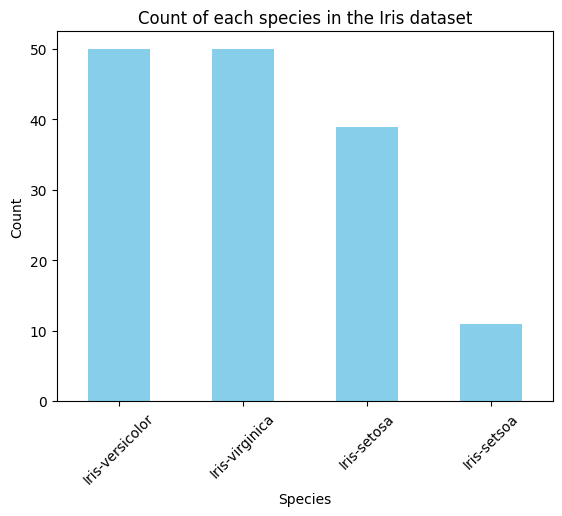

In [28]:
# Get the count of each species
species_counts = dirty_iris['class'].value_counts()

# Plot a bar graph
species_counts.plot.bar(color='skyblue')
plt.title('Count of each species in the Iris dataset')
plt.xlabel('Species')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Find what other problematic values that you notice. Maybe a missing value or a 0 value.

In [16]:
# Print rows with errors
print("Dirty data:\n", dirty_iris.loc[[10, 30, 50]])

Dirty data:
     sepal_length  sepal_width  petal_length  petal_width            class
10           NaN          3.7           1.5          0.2      Iris-setosa
30           4.8          3.1           1.6          0.2      Iris-setsoa
50           7.0          3.2           4.7          0.0  Iris-versicolor


### Data Cleaning

Now clean the problematic values that you identified.

Step 1: Check if there is any missing values. Impute the missing values with the mean of the column.

Step 2: Check if there is any typo in the data. If there is, correct it.

Step 3: Check if there is 0 value in the data. If there is, correct it by imputing the mean of the column.

In [17]:
# Cleaning the data
# Step 1: Impute missing values with the mean of the respective column
for column in dirty_iris.columns[:-1]:  # Excluding the class column
    dirty_iris[column].fillna(dirty_iris[column].mean(), inplace=True)

# Step 2: Correct typos in the class column
dirty_iris['class'] = dirty_iris['class'].str.replace('Iris-setsoa', 'Iris-setosa')

# Step 3: Replace zeros with the mean of the respective column
for column in dirty_iris.columns[:-1]:  # Excluding the class column
    dirty_iris[column] = dirty_iris[column].replace(0, dirty_iris[column].mean())

cleaned_iris = dirty_iris


## Part 11: Machine Learning
### Split the dataset

Please split the dataset into training and testing set. Use 80% of the data for training and 20% for testing. Use random_state=42

In [20]:
from sklearn.model_selection import train_test_split

# Assuming cleaned_iris is your DataFrame
X = cleaned_iris.drop('class', axis=1)  # Features (exclude the class column)
y = cleaned_iris['class']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Apply Algorithm
Apply the algorithm that you have learned in class to train the model. You can use any algorithm that you want. Here use Logistic Regression.

In [22]:
#import Logistic Regression 
from sklearn.linear_model import LogisticRegression

# create model
model = LogisticRegression(max_iter=150, random_state=42)

# train model
model.fit(X_train, y_train)

LogisticRegression(max_iter=150, random_state=42)

### Make Prediction
Make prediction using the testing set

In [23]:
# Make predictions on the testing data
y_pred = model.predict(X_test)

###  Evaluate the model
Evaluate the model using confusion matrix

In [25]:
from sklearn import metrics

# Find accuracy
print(metrics.accuracy_score(y_test, y_pred))

#Find confusion matrix
print(metrics.confusion_matrix(y_test, y_pred))

1.0
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
